# MF calculationg for Gd pyrochlore (problem: inversed sign for J)

## H matrix and Furier trans

kx   ky             kx   kz             ky   kz
                    -2 J Cos[-- + --]   -2 J Cos[-- + --]   -2 J Cos[-- + --]
0                            4    4              4    4              4    4

         kx   ky                                 ky   kz             kx   kz
-2 J Cos[-- + --]                       -2 J Cos[-- - --]   -2 J Cos[-- - --]
         4    4     0                            4    4              4    4

         kx   kz             ky   kz                                 kx   ky
-2 J Cos[-- + --]   -2 J Cos[-- - --]                       -2 J Cos[-- - --]
         4    4              4    4     0                            4    4

         ky   kz             kx   kz             kx   ky
-2 J Cos[-- + --]   -2 J Cos[-- - --]   -2 J Cos[-- - --]
         4    4              4    4              4    4     0
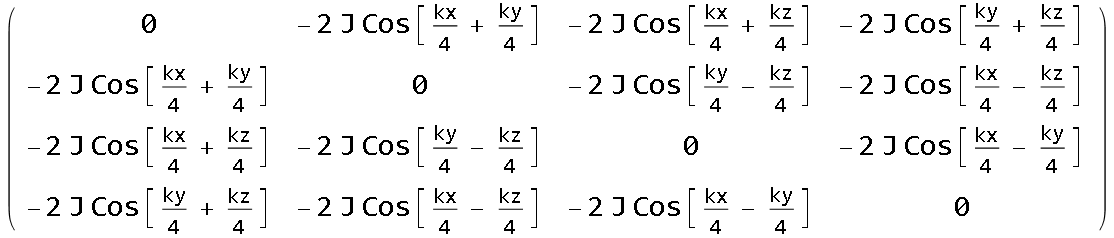

In [ ]:
S=1/2;
r0={1, 1, 1}/8;
r1={1, -1, -1}/8;
r2={-1, 1, -1}/8;
r3={-1, -1, 1}/8;

r0={0,0,0}/4;
r1={1, 1,0}/4;
r2={1, 0, 1}/4;
r3={0, 1, 1}/4;
rs={r0,r1,r2,r3};

gdfmsq[q_]:=Module[
    {s=q/(4 Pi),j=7/2,l=0,ss=7/2,fc,fm},
    fc=(j(j+1)-ss(ss+1)+l(l+1))/(3j(j+1)+ss(ss+1)-l(l+1));
    fm=0.0186 Exp[-25.3867  s^2]+0.2895 Exp[-11.1421 s^2]+0.7135 Exp[-3.7520 s^2]-0.0217+
     s^2 (0.3347 Exp[-18.4758 s^2]+ 1.2465 Exp[-6.8767 s^2]+0.9537 Exp[-2.3184 s^2]+0.0217)*fc;
    fm^2]
(*Phase factor for different bond produced by summing over nearest neighbors*)
Phi[k_,i_,j_]:={
    {             0,  2Cos[k.(r0-r1)],2Cos[k.(r0-r2)],2Cos[k.(r0-r3)]},
    {2Cos[k.(r1-r0)], 0,              2Cos[k.(r1-r2)],2Cos[k.(r1-r3)]},
    {2Cos[k.(r2-r0)], 2Cos[k.(r2-r1)],0,              2Cos[k.(r2-r3)]},
    {2Cos[k.(r3-r0)], 2Cos[k.(r3-r1)],2Cos[k.(r3-r2)],0              }
    }[[i,j]];
(*Here is the Funrier transformation of the spin Hamiltonian for calculating the magnetic structure*)
Hxyz[k_, Jx_, Jy_, Jz_]:=Module[
{Js= {{Jx,0,0}, {0,Jy,0}, {0,0,Jz}};},
Table[Js[[Mod[i-1,3]+1,Mod[j-1,3]+1]]*Phi[k,Mod[i-1,4]+1,Mod[j-1,4]+1],
{i,1,12},{j,1,12}]
]
Hheisdip[q_, J_,D_]:=Module[{Jex,MatDip},
    Jex= {{J,0,0}, {0,J,0}, {0,0,J}};
    MatDip=D Table[Table[If[i==j,0,KroneckerDelta[k,l]-(3(rs[[i]]-rs[[j]])[[k]](rs[[i]]-rs[[j]])[[l]])/Norm[rs[[i]]-rs[[j]]]^2],{k,1,3},{l,1,3}],
    {i,1,4},{j,1,4}];
    ArrayFlatten[Table[-(-Jex+MatDip[[i,j]])Phi[q,i,j],{i,1,4},{j,1,4}]]
    ]

(*In some papers, there is a minus sign before J, we also have in order to have same order of Eigen values and equation*)
Hheis[k_,J_]:=Module[{},
    Table[-J Phi[k,i,j],{i,1,4},{j,1,4}]
]
Hheis[{kx,ky,kz},J]//MatrixForm

## Exchange J and Dipolar D estimation

In [20]:
kb = 0.862
\[Mu]0=4\[Pi] 10^-7;
rnn=3.77 10^-10;
\[Mu]B=9.274 10^-24;
5/3 \[Mu]0/(4\[Pi]) (2.65 \[Mu]B)^2/rnn^3*(6.242 10^21)*11.6 (*in K*)

DGdmeV=\[Mu]0/(4\[Pi]) (7 \[Mu]B)^2/(10.5 10^-10*1.414/4)^3*(6.242 10^21) (*meV*)
DGdK=DGdmeV*11.6
JGdmeV=Solve[-7.7==Jex/kb* 3.5*(3.5+1)*6*2/3,Jex];(*J in meV*)
Jex*3.5^2 /.JGdmeV (*J including s(s+1) or s^2*)

v = 10.26^3/4/10^30;
-\[Mu]0 49 (\[Mu]B)^2 / 3/0.862 * 16 \[Pi] 0.92 /3/v *(6.242 10^21) 

v = 10.45^3/4/10^30;
thetaDip = \[Mu]0 56 (\[Mu]B)^2 / 3* 16 \[Pi] /3/v *(6.242 10^21) 
(-7.7 - thetaDip)/11.6/12*3

-7.7/11.6/12*3

0.862
0.136029
0.051442
0.596727
{-1.29061}
-0.729776
0.739596
-0.181888
-0.165948

0                            0                            0
 
            -dip          kx   ky              kx   ky
        -2 (---- - J) Cos[-- + --]   3 dip Cos[-- + --]
>            2            4    4               4    4
 
                                      -dip          kx   kz
                                  -2 (---- - J) Cos[-- + --]
>    0                                 2            4    4
 
                                            kx   kz
                                  3 dip Cos[-- + --]
>    0                                      4    4
 
                      ky   kz
     -2 (dip - J) Cos[-- + --]
>                     4    4      0                            0



0                            0                            0
 
                  kx   ky                -dip          kx   ky
        3 dip Cos[-- + --]           -2 (---- - J) Cos[-- + --]
>                 4    4                  2            4    4
 


>    0                            0
 
                      kx   kz
     -2 (dip - J) Cos[-- + --]
>                     4    4      0
 
                                      -dip          ky   kz              ky   kz
                                  -2 (---- - J) Cos[-- + --]   3 dip Cos[-- + --]
>    0                                 2            4    4               4    4



0                            0                            0
 


>       0                            0
 
                      kx   ky               kx   kz
     -2 (dip - J) Cos[-- + --]    3 dip Cos[-- + --]
>                     4    4                4    4
 
                                      -dip          kx   kz
                                  -2 (---- - J) Cos[-- + --]
>    0                                 2            4    4
 
                                            ky   kz                -dip          ky   kz
                                  3 dip Cos[-- + --]           -2 (---- - J) Cos[-- + --]
>    0                                      4    4                  2            4    4

    -dip          kx   ky              kx   ky
-2 (---- - J) Cos[-- + --]   3 dip Cos[-- + --]
     2            4    4               4    4             0
 


>       0                            0
 
                                                   ky   kz
                                  -2 (dip - J) Cos[-- - --]
>    0                                             4    4
 


>    0                            0
 
         -dip          kx   kz                                            kx   kz
     -2 (---- - J) Cos[-- - --]                                -3 dip Cos[-- - --]
>         2            4    4     0                                       4    4

          kx   ky                -dip          kx   ky
3 dip Cos[-- + --]           -2 (---- - J) Cos[-- + --]
          4    4                  2            4    4     0
 


>       0                            0
 


>    0                            0
 
         -dip          ky   kz               ky   kz
     -2 (---- - J) Cos[-- - --]   -3 dip Cos[-- - --]
>         2            4    4                4    4
 
                                                   kx   kz
                                  -2 (dip - J) Cos[-- - --]
>    0                                             4    4      0

                                                                           kx   ky
                                                          -2 (dip - J) Cos[-- + --]
0                            0                                             4    4
 


>       0                            0
 


>    0                            0
 
                ky   kz               -dip          ky   kz
     -3 dip Cos[-- - --]          -2 (---- - J) Cos[-- - --]
>               4    4                 2            4    4
 
                kx   kz                                            -dip          kx   kz
     -3 dip Cos[-- - --]                                       -2 (---- - J) C
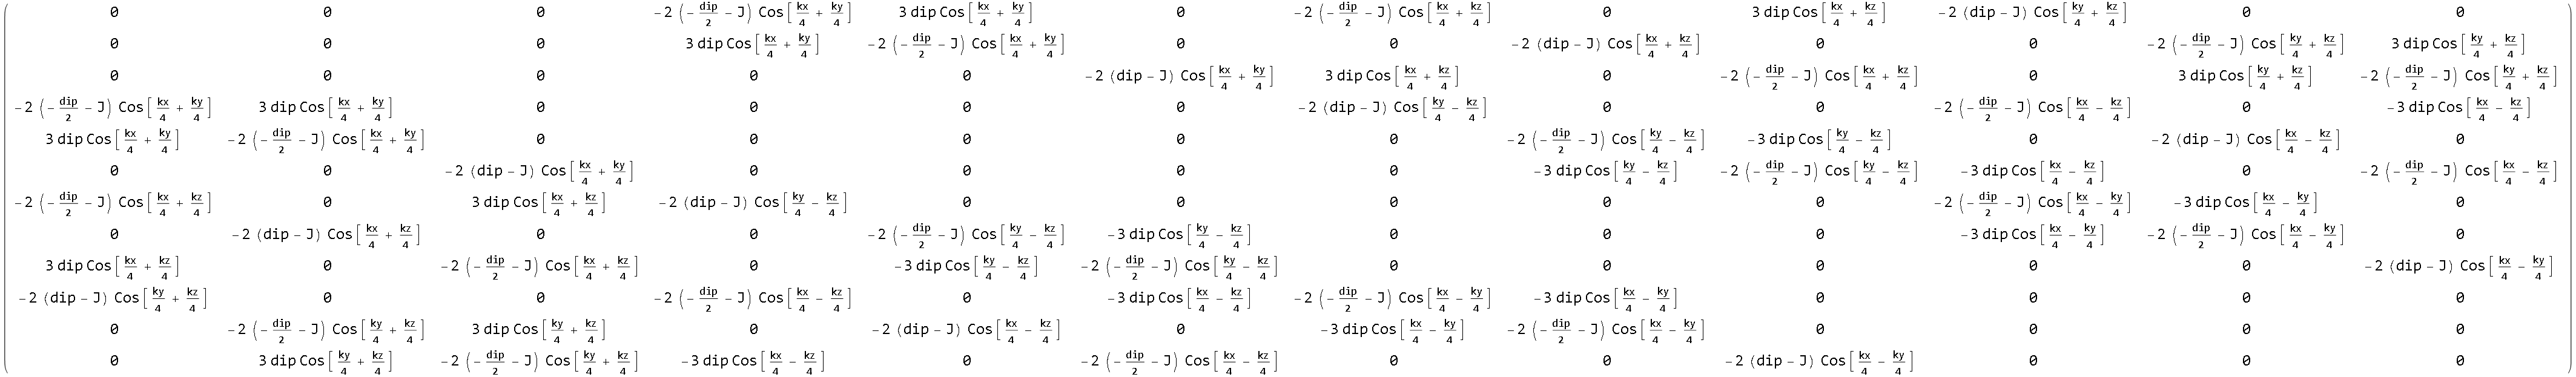

In [35]:
Hheisdip[{kx,ky,kz}, J, dip]//MatrixForm

## Eigen on single tetrahedron

kx   ky        kx   ky        kx   kz
{{2, 2, -2 - Sqrt[2] Sqrt[2 + Cos[-- - --] + Cos[-- + --] + Cos[-- - --] + 
                                  2    2         2    2         2    2
 
             ky   kz        kx   kz        ky   kz
>        Cos[-- - --] + Cos[-- + --] + Cos[-- + --]], 
             2    2         2    2         2    2
 
                               kx   ky        kx   ky        kx   kz        ky   kz
>    -2 + Sqrt[2] Sqrt[2 + Cos[-- - --] + Cos[-- + --] + Cos[-- - --] + Cos[-- - --] + 
                               2    2         2    2         2    2         2    2
 
             kx   kz        ky   kz
>        Cos[-- + --] + Cos[-- + --]]}, 
             2    2         2    2
 
            kx   ky      kx   kz        ky   kz
        Cos[-- + --] Cos[-- - --] - Cos[-- + --]
            4    4       4    4         4    4
>   {{-(----------------------------------------), 
                            kx   ky 2
                   -1 + Cos[-- + --]
                            4    4
 
             kx   kz        kx   ky      ky   kz
        -Cos[-- - --] + Cos[-- + --] Cos[-- + --]
             4    4         4    4       4    4
>     -(-----------------------------------------), 0, 1}, 
                            kx   ky 2
                   -1 + Cos[-- + --]
                            4    4
 
            kx   ky      ky   kz        kx   kz
        Cos[-- + --] Cos[-- - --] - Cos[-- + --]
            4    4       4    4         4    4
>    {-(----------------------------------------), 
                            kx   ky 2
                   -1 + Cos[-- + --]
                            4    4
 
             ky   kz        kx   ky      kx   kz
        -Cos[-- - --] + Cos[-- + --] Cos[-- + --]
             4    4         4    4       4    4
>     -(-----------------------------------------), 1, 0}, 
                            kx   ky 2
                   -1 + Cos[-- + --]
                            4    4
 
               kx   ky      kx   ky      kx   kz          kx   ky      ky   kz
>    {((-8 Cos[-- - --] Cos[-- + --] Cos[-- - --] - 8 Cos[-- + --] Cos[-- - --] - 
               4    4       4    4       4    4           4    4       4    4
 
                  kx   kz          kx   kz 2     kx   kz
>           8 Cos[-- + --] + 8 Cos[-- - --]  Cos[-- + --] - 
                  4    4           4    4        4    4
 
                  kx   ky      ky   kz          kx   kz      ky   kz      ky   kz
>           8 Cos[-- - --] Cos[-- + --] - 8 Cos[-- - --] Cos[-- - --] Cos[-- + --] - 
                  4    4       4    4           4    4       4    4       4    4
 
                          kx   ky      ky   kz
>           4 Sqrt[2] Cos[-- + --] Cos[-- - --] 
                          4    4       4    4
 
                          kx   ky        kx   ky        kx   kz        ky   kz
>            Sqrt[2 + Cos[-- - --] + Cos[-- + --] + Cos[-- - --] + Cos[-- - --] + 
                          2    2         2    2         2    2         2    2
 
                   kx   kz        ky   kz
>              Cos[-- + --] + Cos[-- + --]] - 
                   2    2         2    2
 
                          kx   kz               kx   ky        kx   ky        kx   kz
>           8 Sqrt[2] Cos[-- + --] Sqrt[2 + Cos[-- - --] + Cos[-- + --] + Cos[-- - --] + 
                          4    4                2    2         2    2         2    2
 
                   ky   kz        kx   kz        ky   kz
>              Cos[-- - --] + Cos[-- + --] + Cos[-- + --]] - 
                   2    2         2    2         2    2
 
                          kx   ky      ky   kz
>           4 Sqrt[2] Cos[-- - --] Cos[-- + --] 
                          4    4       4    4
 
                          kx   ky        kx   ky        kx   kz        ky   kz
>            Sqrt[2 + Cos[-- - --] + Cos[-- + --] + Cos[-- - --] + Cos[-- - --] + 
                          2    2         2    2         2    2         2    2
 
                 
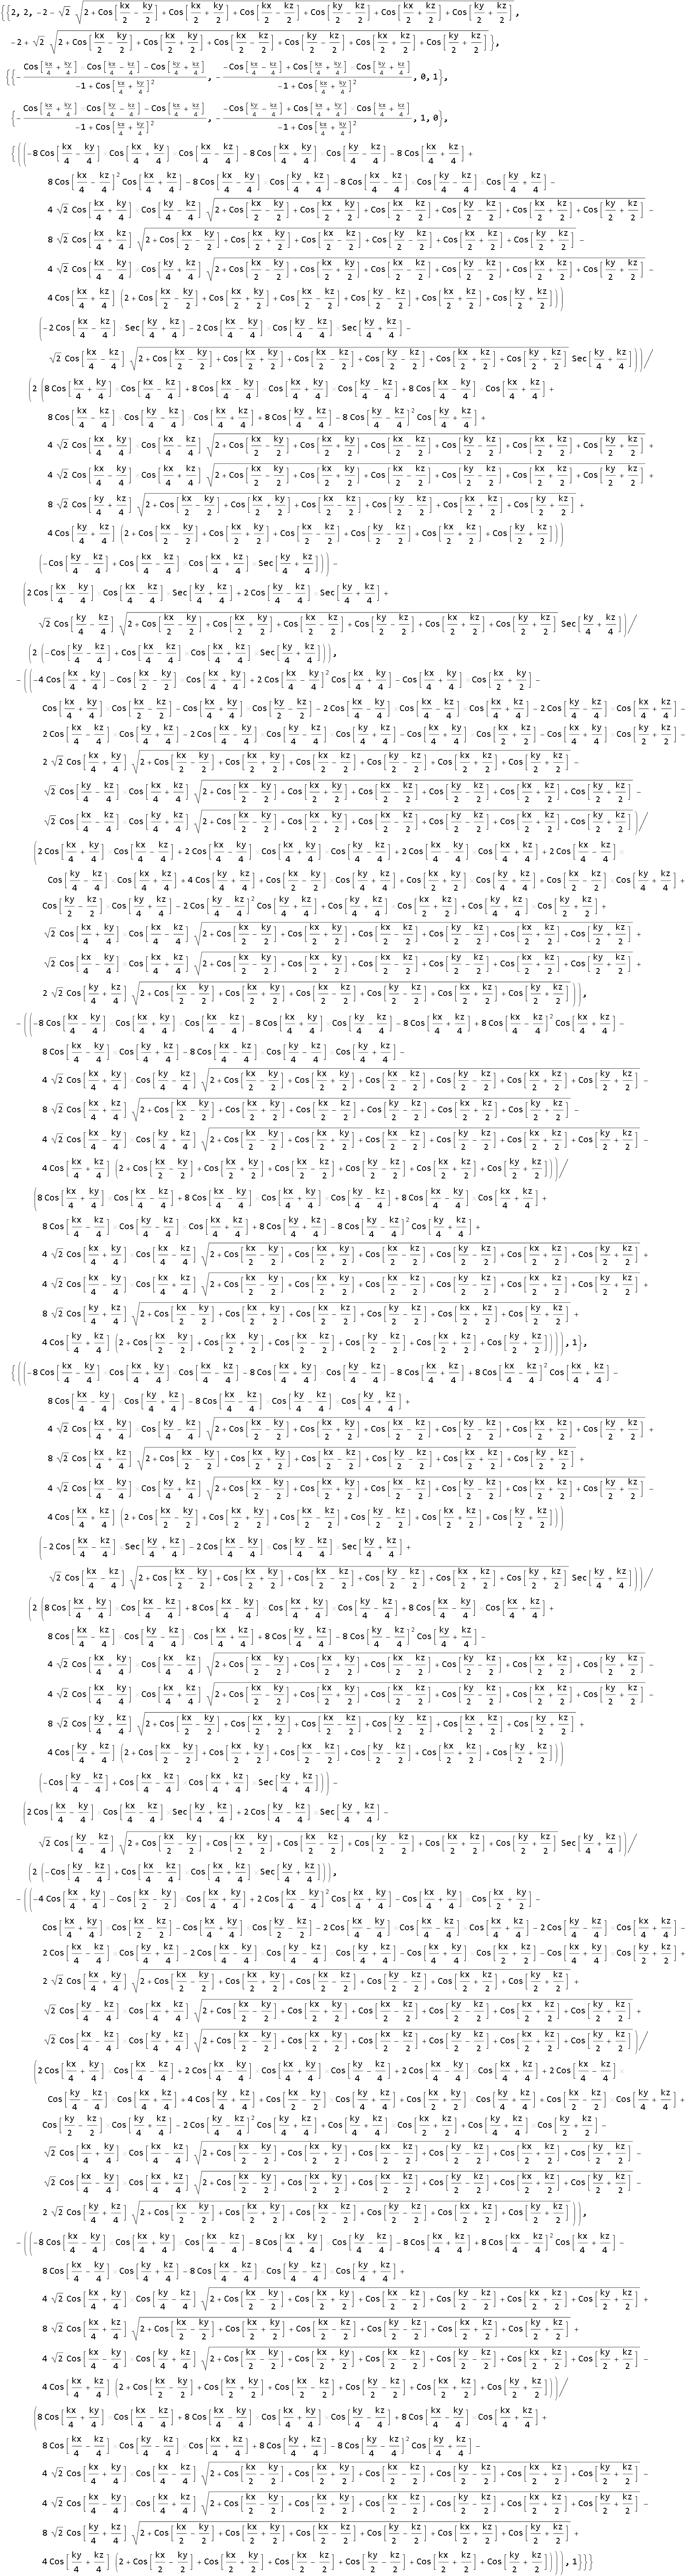

In [100]:
es = Eigensystem[Hheis[{kx,ky,kz},1]];

## No need to distingrushi Q and q (Q=q+G) for diagnalizing?

In [21]:
q = RandomReal[{-1,1},3]
q={0,0,0}
es1=Eigensystem[Hheis[q*2\[Pi],1]];
G= If[RandomChoice[{-1,1},1][[1]]>0,
RandomChoice[{0,2,4},3],
RandomChoice[{1,3,5},3]](*FFC BZ centers are "all even" and "all odd"*)
es2=Eigensystem[Hheis[(q+G)*2\[Pi],1]];
es1//MatrixForm
es2//MatrixForm

{-0.500592, 0.89349, 0.696934}
{0, 0, 0}
{4, 4, 2}
-6              2               2               2

{1, 1, 1, 1}    {-1, 0, 0, 1}   {-1, 0, 1, 0}   {-1, 1, 0, 0}
-6               2                2                2

{-1, -1, 1, 1}   {1, 0, 0, 1}     {1, 0, 1, 0}     {-1, 1, 0, 0}

## Mean field diagnolizing

`1` should be a tensor of type Integer, Real, or Complex; evaluation will use the uncompiled function.: U should be a tensor of type Integer, Real, or Complex; evaluation will use the uncompiled function.

A C compiler cannot be found on your system. Please consult the documentation to learn how to set up suitable compilers.: A C compiler cannot be found on your system. Please consult the documentation to learn how to set up suitable compilers.

A library could not be generated from the compiled function.: A library could not be generated from the compiled function.

kx   ky              kx   kz              ky   kz
{{0, -2 Jex Cos[-- + --], -2 Jex Cos[-- + --], -2 Jex Cos[-- + --]}, 
                4    4               4    4               4    4
 
                kx   ky                 ky   kz              kx   kz
>   {-2 Jex Cos[-- + --], 0, -2 Jex Cos[-- - --], -2 Jex Cos[-- - --]}, 
                4    4                  4    4               4    4
 
                kx   kz              ky   kz                 kx   ky
>   {-2 Jex Cos[-- + --], -2 Jex Cos[-- - --], 0, -2 Jex Cos[-- - --]}, 
                4    4               4    4                  4    4
 
                ky   kz              kx   kz              kx   ky
>   {-2 Jex Cos[-- + --], -2 Jex Cos[-- - --], -2 Jex Cos[-- - --], 0}}
                4    4               4    4               4    4
                kx   ky              kx   kz              ky   kz
{{0, -2 Jex Cos[-- + --], -2 Jex Cos[-- + --], -2 Jex Cos[-- + --]}, 
                4    4               4    4               4    4
 
                kx   ky                 ky   kz              kx   kz
>   {-2 Jex Cos[-- + --], 0, -2 Jex Cos[-- - --], -2 Jex Cos[-- - --]}, 
                4    4                  4    4               4    4
 
                kx   kz              ky   kz                 kx   ky
>   {-2 Jex Cos[-- + --], -2 Jex Cos[-- - --], 0, -2 Jex Cos[-- - --]}, 
                4    4               4    4                  4    4
 
                ky   kz              kx   kz              kx   ky
>   {-2 Jex Cos[-- + --], -2 Jex Cos[-- - --], -2 Jex Cos[-- - --], 0}}
                4    4               4    4               4    4
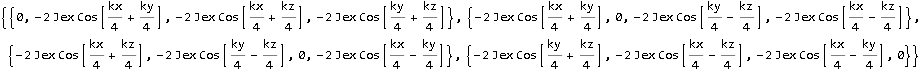
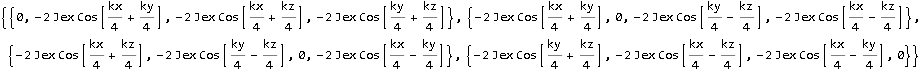

In [57]:
kb=0.0861;
BZ=2\[Pi]{{0,0,0},{0,0,2},{0,0,-2},{0,0,4},{0,0,-4},{1,1,1},{1,1,-1},{1,1,3},{1,1,-3},{2,2,0},{2,2,2},{2,2,-2}}; (*BZ centers in the right half of HHL plane*)
BZ=2\[Pi]{{0,0,0},{0,0,2},{0,0,4},{1,1,1},{1,1,3},{2,2,0},{2,2,2}}; (*BZ centers in the top-right quater of HHL plane*)
(*BZ=2\[Pi] Join[Tuples[{0,2,-2,4,-4,6,-6,8,-8},3],Tuples[{1,-1,3,-3,5,-5,7,-7,9,-9},3]];*)(*FFC BZ centers are "all even" and "all odd"*)

HamMat=Hheis[{kx,ky,kz},Jex]

(*Method 1: use structure fator from RPB1992*)
Fg[G_,Ui_,rs_]:=Module[{},
    Sum[Ui[[j]]Exp[-I G.rs[[j]]],{j,1,Length[Ui]}]
]

sq[Q_,J_,T_]:=Module[
    {G,q,HamMatQ,\[Lambda],U,Fgs,FgsPerp},
    G=Nearest[BZ,Q][[1]];
    q=Q-G;
    (*Print["Q, q and G (/2\[Pi]): ",Q/(2\[Pi]),q/(2\[Pi]),G/(2\[Pi])];*)
    HamMatQ=HamMat/.{kx->q[[1]],ky->q[[2]],kz->q[[3]],Jex->J};
    (*Print["HamMatQ: ",HamMatQ];*)
    {\[Lambda],U}=Eigensystem[HamMatQ];
    (*Fgs=U.Exp[-I rs.G];
    Fgs.(Conjugate[Fgs]/(3kb T-2\[Lambda]))*)
    (*Print["\[Lambda]: ",\[Lambda]]; Print["U: ",U];*)
    Fgs=Table[Fg[G,U[[i]],rs],{i,1,Length[\[Lambda]]}];
    Sum[Fgs[[i]]Conjugate[Fgs[[i]]]/(3kb T-2\[Lambda][[i]]),{i,1,4}]
    (*Fgs=Table[Fg[G,U[[i]],rs],{i,1,4}];
    FgsPerp=Table[{Fgs[[i]],Fgs[[i]],Fgs[[i]]}-Q ({Fgs[[i]],Fgs[[i]],Fgs[[i]]}.Q/Norm[Q]^2),{i,1,4}];
    Sum[gsPerp[[i]].Conjugate[FgsPerp[[i]]]/(3kb T-2\[Lambda][[i]]),{i,1,4}]*)
]

(*Compiled func*)
HamHeisMat=Hheis[{kx,ky,kz},Jex]
CPsqHeis=Compile[{{Qx,_Real},{Qy,_Real},{Qz,_Real},{J,_Real},{T,_Real}},
Module[
{Q={Qx,Qy,Qz},G,q,HamMatQ,\[Lambda],U,Fgs},
G=Nearest[BZ,Q][[1]];
q=Q-G;
(*Print["Q, q and G (/2\[Pi]): ",Q/(2\[Pi]),q/(2\[Pi]),G/(2\[Pi])];*)
HamMatQ=HamHeisMat/.{kx->q[[1]],ky->q[[2]],kz->q[[3]],Jex->J};
(*Print["HamMatQ: ",HamMatQ];*)
{\[Lambda],U}=Eigensystem[HamMatQ];
(*Print["\[Lambda]: ",\[Lambda]]; Print["U: ",U];*)
Fgs=U.Exp[-I rs.G];
Fgs.(Conjugate[Fgs]/(3kb T-2\[Lambda]))
],CompilationTarget->"C",Parallelization->True];

(*Remember the evaluated eigen for q and J: 5% faster*)
eigenRem[q_,J_]:=eigenRem[q,J]=Eigensystem[HamMat/.{kx->q[[1]],ky->q[[2]],kz->q[[3]],Jex->J}]
sqRem[Q_,HamMat_,J_,T_]:=Module[
{G,q,HamMatQ,\[Lambda],U,Fgs,FgsPerp},
G=Nearest[BZ,Q][[1]];
q=Q-G;
(*Print["Q, q and G (/2\[Pi]): ",Q/(2\[Pi]),q/(2\[Pi]),G/(2\[Pi])];*)
{\[Lambda],U}=eigenRem[q,J];
(*Print["\[Lambda]: ",\[Lambda]]; Print["U: ",U];*)
Fgs=Table[Fg[G,U[[i]],rs],{i,1,Length[\[Lambda]]}];
Sum[Fgs[[i]]Conjugate[Fgs[[i]]]/(3kb T-2\[Lambda][[i]]),{i,1,4}]
]

(*Method 2: use \[Chi]qvv from RPB2002; a bit slower*)
\[Chi]qvv[\[Lambda]_,U_,v1_,v2_,T_]:=Module[{},
Sum[U[[i,v1]]Conjugate[U[[i,v2]]]/(3kb T-2\[Lambda][[i]]),{i,1,4}]
]
sqprb2002[Q_,HamMat_,J_,T_]:=Module[
{G,q,HamMatQ,\[Lambda],U},
G=Nearest[BZ,Q][[1]];
q=Q-G;
(*Print["Q, q and G (/2\[Pi]): ",Q/(2\[Pi]),q/(2\[Pi]),G/(2\[Pi])];*)
HamMatQ=HamMat/.{kx->q[[1]],ky->q[[2]],kz->q[[3]],Jex->J};
(*Print["HamMatQ: ",HamMatQ];*)
{\[Lambda],U}=Eigensystem[HamMatQ];
(*Print["\[Lambda]: ",\[Lambda]]; Print["U: ",U];*)
Sum[\[Chi]qvv[\[Lambda],U,v1,v2,T]Cos[-G.(rs[[v1]]-rs[[v2]])],{v1,1,4},{v2,1,4}]
]

eigenE[Q_,HamMat_,J_]:=Module[
{G,q,HamMatQ,\[Lambda]},
HamMatQ=HamMat/.{kx->Q[[1]],ky->Q[[2]],kz->Q[[3]],Jex->J};
\[Lambda]=Eigenvalues[HamMatQ]
(*Print["\[Lambda]: ",\[Lambda]]; Print["U: ",U];*)
]
eigen[Q_,HamMat_,J_]:=Module[
{G,q,HamMatQ,\[Lambda],U},
HamMatQ=HamMat/.{kx->Q[[1]],ky->Q[[2]],kz->Q[[3]],Jex->J};
{\[Lambda],U}=Eigensystem[HamMatQ];
Print["\[Lambda]: ",\[Lambda]]; Print["U: ",U];
{\[Lambda],U}
]

In [13]:
test = {
 {0.0, 2.0, 2.0, 2.0},
 {2.0, 0.0, -2.0, -2.0},
 {2.0, -2.0, 0.0, -2.0},
 {2.0, -2.0, -2.0, 0.0}
 }
{vals, vecs} = Eigensystem[test]
vecs[[1]].vecs[[2]]

{{0., 2., 2., 2.}, {2., 0., -2., -2.}, {2., -2., 0., -2.}, {2., -2., -2., 0.}}
{{-6., 2., 2., 2.}, {{-0.5, 0.5, 0.5, 0.5}, {0.211325, 0.788675, -0.57735, 0.}, 
 
>    {0.788675, 0.211325, 0.57735, 0.}, {0.288675, -0.288675, -0.288675, 0.866025}}}
          -17
5.55112 10

In [141]:
sq[{0.001,0,0},HamMat,1,50]

0.160546

-Graphics3D-
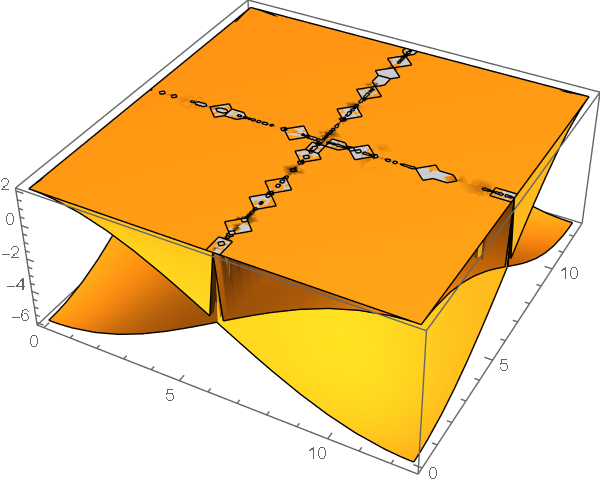

In [122]:
(*Plot function*)
eigenEqxyz[qx_,qy_,qz_]:=Module[{},eigenE[{qx,qy,qz},HamMat,1]]

fig1=Plot3D[eigenEqxyz[x,y,0][[1]],{x,0,4\[Pi]},{y,0,4\[Pi]},Mesh->False,MaxRecursion->5]; (*large MaxRecursion takes long*)
fig2=Plot3D[eigenEqxyz[x,y,0][[2]],{x,0,4\[Pi]},{y,0,4\[Pi]},Mesh->False,MaxRecursion->5];
fig3=Plot3D[eigenEqxyz[x,y,0][[3]],{x,0,4\[Pi]},{y,0,4\[Pi]},Mesh->False];
fig4=Plot3D[eigenEqxyz[x,y,0][[4]],{x,0,4\[Pi]},{y,0,4\[Pi]},Mesh->False];
Show[fig1,fig2,fig3,fig4]

-Graphics-
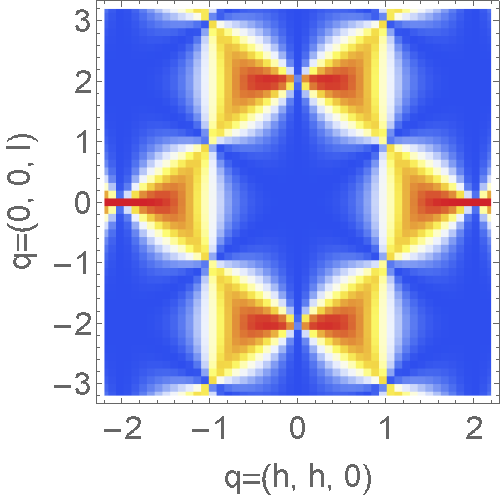

In [129]:
npix=50;
qtab=Table[{2.2*i/npix+0.00001, 2.2*i/npix, 3.2*j/npix}, {i, 0, npix}, {j, 0, npix}];
qtab=Table[{-2.2+4.4*i/npix+0.00001, -2.2+4.4*i/npix, -3.2+6.4*j/npix}, {i, 0, npix}, {j, 0, npix}];

qlist=2\[Pi] Flatten[qtab,1];
sqlist = ParallelTable[sq[qlist[[i]],HamMat,1,15.5], {i, 1, Length[qlist]}];
testI= Table[{qlist[[i,1]]/(2\[Pi]), qlist[[i,3]]/(2\[Pi]),sqlist[[i]]}, {i, 1, Length[sqlist]}];
ListDensityPlot[testI, InterpolationOrder->0, ColorFunction->"TemperatureMap", ColorFunctionScaling->True, (*PlotRange\[Rule]{{0, 2.2}, {0, 3.2}, All},*) LabelStyle->FontSize->20, ImageSize->300, FrameLabel->{Text["q=(h, h, 0)"], Text["q=(0, 0, l)"], None, None}
(*,
RegionFunction\[Rule]Function[{k, l}, 0<(k)^2/2.1^2+(l)^2/3.1^2<1]*)]

In [76]:
sqPolar[Q_?NumericQ,\[Theta]_?NumericQ,\[Phi]_?NumericQ]:=Module[{},
sq[{Q Sin[\[Theta]]Cos[\[Phi]],Q Sin[\[Theta]]Sin[\[Phi]],Q Cos[\[Theta]]},1,15.5]Sin[\[Theta]]
]

NIntegrate[sqPolar[1,\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},WorkingPrecision->1]//AbsoluteTiming
NIntegrate[sqPolar[1,\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},WorkingPrecision->2]//AbsoluteTiming
NIntegrate[sqPolar[1,\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},WorkingPrecision->3]//AbsoluteTiming
NIntegrate[sqPolar[1,\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},PrecisionGoal->1]//AbsoluteTiming
NIntegrate[sqPolar[1,\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},PrecisionGoal->2]//AbsoluteTiming
NIntegrate[sqPolar[1,\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},PrecisionGoal->3]//AbsoluteTiming
NIntegrate[sqPolar[1,\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},AccuracyGoal->1]//AbsoluteTiming
NIntegrate[sqPolar[1,\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},AccuracyGoal->2]//AbsoluteTiming
NIntegrate[sqPolar[1,\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},AccuracyGoal->3]//AbsoluteTiming

{0.053126, 3.}
{0.0700573, 3.4}
{0.126564, 3.56}
{0.0708942, 3.54326}
{0.139074, 3.58388}
{0.236193, 3.58316}
{0.103608, 3.57921}
{0.213874, 3.58335}
{0.248897, 3.58311}

In [ ]:
powder=ParallelTable[
    {q,NIntegrate[sqPolar[q/(2\[Pi]/10.5)*2\[Pi],\[Theta],\[Phi]],{\[Theta],0,\[Pi]},{\[Phi],0,2\[Pi]},PrecisionGoal->5]/(4\[Pi])},
    {q,0.000001,5,0.05}
    ]
ListLinePlot[{powder,{powder[[All,1]],gdfmsq[powder[[All,1]]]*powder[[All,2]]}//Transpose}]

-Graphics-
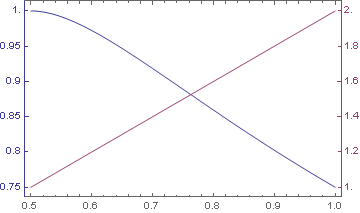

In [7]:
TwoAxisPlot[{f_, g_}, {x_, x1_, x2_}] := 
 Module[{fgraph, ggraph, frange, grange, fticks, 
   gticks}, {fgraph, ggraph} = 
   MapIndexed[
    Plot[#, {x, x1, x2}, Axes -> True, 
      PlotStyle -> ColorData[1][#2[[1]]]] &, {f, g}]; {frange, 
    grange} = (PlotRange /. AbsoluteOptions[#, PlotRange])[[
      2]] & /@ {fgraph, ggraph}; fticks = N@FindDivisions[frange, 5]; 
  gticks = Quiet@
    Transpose@{fticks, 
      ToString[NumberForm[#, 2], StandardForm] & /@ 
       Rescale[fticks, frange, grange]}; 
  Show[fgraph, 
   ggraph /. 
    Graphics[graph_, s___] :> 
     Graphics[
      GeometricTransformation[graph, 
       RescalingTransform[{{0, 1}, grange}, {{0, 1}, frange}]], s], 
   Axes -> False, Frame -> True, 
   FrameStyle -> {ColorData[1] /@ {1, 2}, {Automatic, Automatic}}, 
   FrameTicks -> {{fticks, gticks}, {Automatic, Automatic}}]]
   
TwoAxisPlot[{0.5/x(2-0.5/x), (x/0.5)},{x,0.5, 1.0}]
